In [9]:
# Aquí se importan las librerias que se van a utiliar

%reset

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import keras.optimizers
import matplotlib.pyplot as plt

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Utilidades

In [10]:
# Función para imprimir la supervivencia de los personajes
def Imprimir_Prediccion_Vida(personajes, probabilidad):
    for i in range(0, personajes.shape[0]):
        print("- " + str(personajes[i]) + ": " + str(round(probabilidad[i][0],2)) + "%")

In [11]:
# Función para imprimir la supervivencia de los personajes
def Imprimir_Medias_Pesos(nombres, pesos):
    for i in range(0, nombres.shape[0]):
        print("- " + str(nombres[i]) + ": " + str(pesos[i]))

#### Recolección datos

In [12]:
# Obtención del fichero de datos de entrenamiento y validación
datos = pd.read_csv('../Datos/got.csv')

# Recolección de información de entrada para la red neuronal (especificada en el enunciado)
genero = datos.loc[:,'male']
aparicion_libro_1 = datos.loc[:,'book1']
aparicion_libro_2 = datos.loc[:,'book2']
aparicion_libro_3 = datos.loc[:,'book3']
aparicion_libro_4 = datos.loc[:,'book4']
aparicion_libro_5 = datos.loc[:,'book5']
casado = datos.loc[:,'isMarried']
noble = datos.loc[:,'isNoble']
numero_personas_cercanas_muertas = datos.loc[:,'numDeadRelations']
popular = datos.loc[:,'isPopular']
    
# Unión de la información de entrada
entrada = np.array([[genero],[aparicion_libro_1],[aparicion_libro_2],[aparicion_libro_3],[aparicion_libro_4],
        [aparicion_libro_5],[casado],[noble],[numero_personas_cercanas_muertas],[popular]])

# Recolocación
entrada = entrada.transpose().reshape(1946, 10)

# Recolección de la salida esperada de la red neuronal
salida_esperada = np.array(datos.loc[:,'alive'])

# Conjunto entrenamiento
entrada_entrenamiento = entrada[:1750,:]
salida_entrenamiento = salida_esperada[:1750]

# Conjunto validación
entrada_validacion = entrada[1750:,:]
salida_validacion = salida_esperada[1750:]

#### Recolección datos de predicción.

In [13]:
# Obtención del fichero de datos de entrenamiento
datos_pre = pd.read_csv('../Datos/got_predicciones.csv')

# Recolección de información de entrada para la red neuronal
genero = datos_pre.loc[:,'male']
aparicion_libro_1 = datos_pre.loc[:,'book1']
aparicion_libro_2 = datos_pre.loc[:,'book2']
aparicion_libro_3 = datos_pre.loc[:,'book3']
aparicion_libro_4 = datos_pre.loc[:,'book4']
aparicion_libro_5 = datos_pre.loc[:,'book5']
casado = datos_pre.loc[:,'isMarried']
noble = datos_pre.loc[:,'isNoble']
numero_personas_cercanas_muertas = datos_pre.loc[:,'numDeadRelations']
popular = datos_pre.loc[:,'isPopular']
    
# Unión de la información de entrada
entrada_pre = np.array([[genero],[aparicion_libro_1],[aparicion_libro_2],[aparicion_libro_3],[aparicion_libro_4],
        [aparicion_libro_5],[casado],[noble],[numero_personas_cercanas_muertas],[popular]])

# Recolocación
entrada_pre = entrada_pre.transpose().reshape(5, 10)

### Implementación 1. Entrenamiento GoT.

In [14]:
# Configuración de la red neuronal
model = Sequential()

# Entrada / Capa oculta
model.add(Dense(units=260, activation='relu', input_dim=10))

# Capa de salida
model.add(Dense(units=1, activation='sigmoid'))

# Compilado
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=0.001), metrics = ['accuracy'])

# Entrenamiento
datos_entrenamiento = model.fit(entrada_entrenamiento, salida_entrenamiento,  epochs=200, verbose=1, validation_data = (entrada_validacion, salida_validacion))

print("\n> Entrenamiento realizado con éxito.")

Train on 1750 samples, validate on 196 samples
Epoch 1/200
1750/1750 [==============================] - 0s 175us/step - loss: 0.0801 - acc: 0.0017 - val_loss: 0.0943 - val_acc: 0.0000e+00
Epoch 2/200
1750/1750 [==============================] - 0s 35us/step - loss: 0.0613 - acc: 0.0017 - val_loss: 0.0895 - val_acc: 0.0051
Epoch 3/200
1750/1750 [==============================] - 0s 43us/step - loss: 0.0570 - acc: 0.0011 - val_loss: 0.0909 - val_acc: 0.0051
Epoch 4/200
1750/1750 [==============================] - 0s 31us/step - loss: 0.0558 - acc: 0.0017 - val_loss: 0.0898 - val_acc: 0.0102
Epoch 5/200
1750/1750 [==============================] - 0s 34us/step - loss: 0.0553 - acc: 0.0017 - val_loss: 0.0882 - val_acc: 0.0102
Epoch 6/200
1750/1750 [==============================] - 0s 31us/step - loss: 0.0544 - acc: 0.0017 - val_loss: 0.0883 - val_acc: 0.0102
Epoch 7/200
1750/1750 [==============================] - 0s 31us/step - loss: 0.0541 - acc: 0.0017 - val_loss: 0.0865 - val_acc: 0.0

Epoch 120/200
1750/1750 [==============================] - 0s 28us/step - loss: 0.0479 - acc: 0.0023 - val_loss: 0.0790 - val_acc: 0.0102
Epoch 121/200
1750/1750 [==============================] - 0s 30us/step - loss: 0.0479 - acc: 0.0023 - val_loss: 0.0799 - val_acc: 0.0102
Epoch 122/200
1750/1750 [==============================] - 0s 29us/step - loss: 0.0476 - acc: 0.0023 - val_loss: 0.0843 - val_acc: 0.0102
Epoch 123/200
1750/1750 [==============================] - 0s 29us/step - loss: 0.0477 - acc: 0.0023 - val_loss: 0.0820 - val_acc: 0.0102
Epoch 124/200
1750/1750 [==============================] - 0s 30us/step - loss: 0.0476 - acc: 0.0023 - val_loss: 0.0815 - val_acc: 0.0102
Epoch 125/200
1750/1750 [==============================] - 0s 30us/step - loss: 0.0476 - acc: 0.0023 - val_loss: 0.0822 - val_acc: 0.0102
Epoch 126/200
1750/1750 [==============================] - 0s 31us/step - loss: 0.0483 - acc: 0.0023 - val_loss: 0.0808 - val_acc: 0.0102
Epoch 127/200
1750/1750 [=========

El score del conjunto de validación es de: 0.0838.


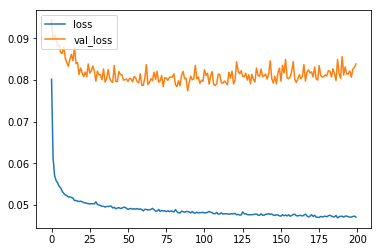

In [15]:
# Gráfica
plt.plot(datos_entrenamiento.history['loss'], label='loss')
plt.plot(datos_entrenamiento.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

# Puntuación
score = model.evaluate(entrada_validacion, salida_validacion, verbose = 0)

print("El score del conjunto de validación es de: %.4f." % (score[0]))

### Implementación 2. Predicción.

In [16]:
print("Probabilidad de supervivencia: \n")

Imprimir_Prediccion_Vida(datos_pre['name'], model.predict(entrada_pre) * 100)

Probabilidad de supervivencia: 

- Tommen Baratheon: 7.07%
- Daenerys Targaryen: 11.61%
- Coldhands: 77.97%
- Othell Yarwyck: 59.32%
- Roland Crakehall (Kingsguard): 47.07%


### Categorización de los pesos. 

In [17]:
pesos_entrada = model.get_weights()[0]

nombres_entrada = np.array(['male','book1','book2','book3',
                            'book4','book5','isMarried','isNoble',
                            'numDeadRelations','isPopular'])

medias = np.array([ [np.average(pesos_entrada[0])], [np.average(pesos_entrada[1])], [np.average(pesos_entrada[2])],
                    [np.average(pesos_entrada[3])], [np.average(pesos_entrada[4])], [np.average(pesos_entrada[5])],
                    [np.average(pesos_entrada[6])], [np.average(pesos_entrada[7])], [np.average(pesos_entrada[8])],
                    [np.average(pesos_entrada[9])]])

print("Pesos medios por entrada")
print("------------------------")
print(" Característica    Peso ")
print("------------------------")

Imprimir_Medias_Pesos(nombres_entrada, medias)

Pesos medios por entrada
------------------------
 Característica    Peso 
------------------------
- male: [-0.03003057]
- book1: [-0.04740242]
- book2: [-0.03694244]
- book3: [-0.0261386]
- book4: [ 0.00123119]
- book5: [-0.03290815]
- isMarried: [-0.02670936]
- isNoble: [-0.00386382]
- numDeadRelations: [-0.05936071]
- isPopular: [ 0.0004857]


#### La característica isPopular es la que más tiende a 0, por lo que es la menos relevante para la red.

#### La siguiente red predice también la probabilidad de supervivencia de los personajes pero sin la característica isPopular. Debería dar resultados similares pero no iguales, aunque afecte poco a la predicción, algo si que afecta.

In [18]:
# Obtención del fichero de datos de entrenamiento
datos = pd.read_csv('../Datos/got.csv')

# Recolección de información de entrada para la red neuronal
genero = datos.loc[:,'male']
aparicion_libro_1 = datos.loc[:,'book1']
aparicion_libro_2 = datos.loc[:,'book2']
aparicion_libro_3 = datos.loc[:,'book3']
aparicion_libro_4 = datos.loc[:,'book4']
aparicion_libro_5 = datos.loc[:,'book5']
casado = datos.loc[:,'isMarried']
noble = datos.loc[:,'isNoble']
numero_personas_cercanas_muertas = datos.loc[:,'numDeadRelations']
    
# Unión de la información de entrada
entrada = np.array([[genero],[aparicion_libro_1],[aparicion_libro_2],[aparicion_libro_3],[aparicion_libro_4],
        [aparicion_libro_5],[casado],[noble],[numero_personas_cercanas_muertas]])

entrada = entrada.transpose().reshape(1946, 9)

# Recolección de la salida esperada de la red neuronal
salida_esperada = np.array(datos.loc[:,'alive'])

# Conjunto entrenamiento
entrada_entrenamiento = entrada[:1750,:]
salida_entrenamiento = salida_esperada[:1750]

# Conjunto validación
entrada_validacion = entrada[1750:,:]
salida_validacion = salida_esperada[1750:]

# Configuración de la red neuronal
model_sin_isPopular = Sequential()
model_sin_isPopular.add(Dense(units=260, activation='relu', input_dim=9))
model_sin_isPopular.add(Dense(units=1, activation='sigmoid'))

model_sin_isPopular.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=0.001), metrics = ['accuracy'])

datos_entrenamiento_sin_isPopular= model_sin_isPopular.fit(entrada_entrenamiento, salida_entrenamiento, epochs=200, verbose=1, validation_data = (entrada_validacion, salida_validacion))

print("\n> Entrenamiento realizado con éxito.")

Train on 1750 samples, validate on 196 samples
Epoch 1/200
1750/1750 [==============================] - 0s 209us/step - loss: 0.0840 - acc: 0.0017 - val_loss: 0.0860 - val_acc: 0.0051
Epoch 2/200
1750/1750 [==============================] - 0s 34us/step - loss: 0.0622 - acc: 0.0011 - val_loss: 0.0960 - val_acc: 0.0051
Epoch 3/200
1750/1750 [==============================] - 0s 33us/step - loss: 0.0584 - acc: 0.0017 - val_loss: 0.0921 - val_acc: 0.0051
Epoch 4/200
1750/1750 [==============================] - 0s 38us/step - loss: 0.0571 - acc: 0.0011 - val_loss: 0.0892 - val_acc: 0.0102
Epoch 5/200
1750/1750 [==============================] - 0s 36us/step - loss: 0.0563 - acc: 0.0017 - val_loss: 0.0911 - val_acc: 0.0102
Epoch 6/200
1750/1750 [==============================] - 0s 29us/step - loss: 0.0554 - acc: 0.0017 - val_loss: 0.0864 - val_acc: 0.0102
Epoch 7/200
1750/1750 [==============================] - 0s 28us/step - loss: 0.0551 - acc: 0.0017 - val_loss: 0.0895 - val_acc: 0.0102


Epoch 120/200
1750/1750 [==============================] - 0s 31us/step - loss: 0.0491 - acc: 0.0023 - val_loss: 0.0834 - val_acc: 0.0102
Epoch 121/200
1750/1750 [==============================] - 0s 31us/step - loss: 0.0494 - acc: 0.0023 - val_loss: 0.0813 - val_acc: 0.0102
Epoch 122/200
1750/1750 [==============================] - 0s 35us/step - loss: 0.0492 - acc: 0.0023 - val_loss: 0.0838 - val_acc: 0.0102
Epoch 123/200
1750/1750 [==============================] - 0s 37us/step - loss: 0.0491 - acc: 0.0023 - val_loss: 0.0794 - val_acc: 0.0102
Epoch 124/200
1750/1750 [==============================] - 0s 35us/step - loss: 0.0490 - acc: 0.0023 - val_loss: 0.0801 - val_acc: 0.0102
Epoch 125/200
1750/1750 [==============================] - 0s 29us/step - loss: 0.0490 - acc: 0.0023 - val_loss: 0.0801 - val_acc: 0.0102
Epoch 126/200
1750/1750 [==============================] - 0s 28us/step - loss: 0.0490 - acc: 0.0023 - val_loss: 0.0812 - val_acc: 0.0102
Epoch 127/200
1750/1750 [=========

El score del conjunto de validación es de: 0.0795.


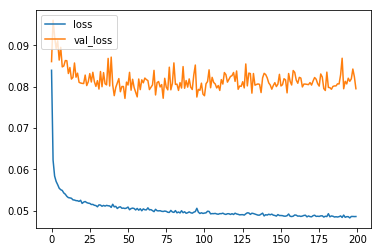

In [19]:
plt.plot(datos_entrenamiento_sin_isPopular.history['loss'], label='loss')
plt.plot(datos_entrenamiento_sin_isPopular.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

score = model_sin_isPopular.evaluate(entrada_validacion, salida_validacion, verbose = 0)

print("El score del conjunto de validación es de: %.4f." % (score[0]))

In [27]:
# Obtención del fichero de datos de entrenamiento
datos_pre_sin_isPopular = pd.read_csv('../Datos/got_predicciones.csv')

# Recolección de información de entrada para la red neuronal
genero_sin_isPopular = datos_pre_sin_isPopular.loc[:,'male']
aparicion_libro_1_sin_isPopular = datos_pre_sin_isPopular.loc[:,'book1']
aparicion_libro_2_sin_isPopular = datos_pre_sin_isPopular.loc[:,'book2']
aparicion_libro_3_sin_isPopular = datos_pre_sin_isPopular.loc[:,'book3']
aparicion_libro_4_sin_isPopular = datos_pre_sin_isPopular.loc[:,'book4']
aparicion_libro_5_sin_isPopular = datos_pre_sin_isPopular.loc[:,'book5']
casado_sin_isPopular = datos_pre_sin_isPopular.loc[:,'isMarried']
noble_sin_isPopular = datos_pre_sin_isPopular.loc[:,'isNoble']
numero_personas_cercanas_muertas_sin_isPopular = datos_pre_sin_isPopular.loc[:,'numDeadRelations']
    
# Unión de la información de entrada
entrada_pre_sin_isPopular = np.array([[genero_sin_isPopular],[aparicion_libro_1_sin_isPopular],[aparicion_libro_2_sin_isPopular],[aparicion_libro_3_sin_isPopular],[aparicion_libro_4_sin_isPopular],
        [aparicion_libro_5_sin_isPopular],[casado_sin_isPopular],[noble_sin_isPopular],[numero_personas_cercanas_muertas_sin_isPopular]])

entrada_pre_sin_isPopular = entrada_pre_sin_isPopular.transpose().reshape(5, 9)

print("Probabilidad de supervivencia sin IsPopular: \n")

Imprimir_Prediccion_Vida(datos_pre['name'], model_sin_isPopular.predict(entrada_pre_sin_isPopular) * 100)

Probabilidad de supervivencia sin IsPopular: 

- Tommen Baratheon: 7.39%
- Daenerys Targaryen: 16.12%
- Coldhands: 75.17%
- Othell Yarwyck: 52.06%
- Roland Crakehall (Kingsguard): 42.43%


### Ahora probamos a modificar las características más relevantes para demostrar que así lo son y forzar que otro personaje muera.



In [20]:
# Obtención del fichero de datos de entrenamiento
datos_pre = pd.read_csv('../Datos/got_predicciones_modificado.csv')

# Recolección de información de entrada para la red neuronal
genero = datos_pre.loc[:,'male']
aparicion_libro_1 = datos_pre.loc[:,'book1']
aparicion_libro_2 = datos_pre.loc[:,'book2']
aparicion_libro_3 = datos_pre.loc[:,'book3']
aparicion_libro_4 = datos_pre.loc[:,'book4']
aparicion_libro_5 = datos_pre.loc[:,'book5']
casado = datos_pre.loc[:,'isMarried']
noble = datos_pre.loc[:,'isNoble']
numero_personas_cercanas_muertas = datos_pre.loc[:,'numDeadRelations']
popular = datos_pre.loc[:,'isPopular']
    
# Unión de la información de entrada
entrada_pre = np.array([[genero],[aparicion_libro_1],[aparicion_libro_2],[aparicion_libro_3],[aparicion_libro_4],
        [aparicion_libro_5],[casado],[noble],[numero_personas_cercanas_muertas],[popular]])

entrada_pre = entrada_pre.transpose().reshape(5, 10)

print("Probabilidad de supervivencia: \n")
Imprimir_Prediccion_Vida(datos_pre['name'], model.predict(entrada_pre) * 100)


Probabilidad de supervivencia: 

- Tommen Baratheon: 7.07%
- Daenerys Targaryen: 44.81%
- Coldhands: 77.97%
- Othell Yarwyck: 59.32%
- Roland Crakehall (Kingsguard): 47.07%
